# Chapter 3: What is the relationship between housing characteristics and complaints?
Does the Complaint Type that you identified in response to Question 1 have an obvious relationship with any particular characteristic or characteristic of the Houses?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 500
pd.options.display.max_columns = 60

sns.set()
sns.set_style('whitegrid')

In [2]:
df311_h = pd.read_pickle('df311_h.pkl')
df311_h.head()

,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude,Created DateTime,Year,Month
0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT / HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993,2020-02-02 06:09:17,2020,2
1,45527528,02/02/2020 02:27:41 AM,NaN,HEAT / HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432,2020-02-02 02:27:41,2020,2
2,45530329,02/02/2020 12:13:18 PM,NaN,HEAT / HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558,2020-02-02 12:13:18,2020,2
3,45530344,02/02/2020 07:52:08 AM,NaN,HEAT / HOT WATER,RESIDENTIAL BUILDING,10456.0,1131 MORRIS AVENUE,MORRIS AVENUE,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.831381,-73.915218,2020-02-02 07:52:08,2020,2
4,45527939,02/02/2020 09:00:54 AM,NaN,HEAT / HOT WATER,RESIDENTIAL BUILDING,11372.0,37-20 81 STREET,81 STREET,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.749320,-73.885190,2020-02-02 09:00:54,2020,2


## The PLUTO Bronx dataset
It is highly recommended to read about the variables used in the code below to get a bit more familiar with them in order to understand the process and conclusions.

The descriptions of each variable can be found through the following link: https://www1.nyc.gov/assets/planning/download/pdf/data-maps/open-data/pluto_datadictionary.pdf?r=20v3

In [3]:
df_bronx = pd.read_csv("BX_18v1.csv")
df_bronx.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthCenterDistrict,HealthArea,SanitBoro,SanitDistrict,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,SPDist3,LtdHeight,SplitZone,BldgClass,LandUse,...,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BX,2260,1,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,122 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,Z9,NaN,...,130500,161100,0,0,0,0,0,NaN,NaN,0.00,6.02,5.0,6.5,2,2022600001,0,19,1005957.0,232162.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
1,BX,2260,4,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,126 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,G5,7.0,...,117000,326700,0,0,1931,1994,0,NaN,NaN,0.05,6.02,5.0,6.5,2,2022600004,0,19,1006076.0,232156.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
2,BX,2260,10,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,138 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,F5,6.0,...,153000,879300,0,0,1931,0,0,NaN,NaN,1.13,6.02,5.0,6.5,2,2022600010,0,19,1006187.0,232036.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
3,BX,2260,17,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,144 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,C1,2.0,...,51300,332550,0,0,1931,2001,0,NaN,NaN,5.00,6.02,5.0,6.5,2,2022600017,0,19,1006299.0,232033.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
4,BX,2260,18,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,148 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,C7,2.0,...,17490,125304,0,52349,1920,2009,0,NaN,NaN,4.58,6.02,5.0,6.5,2,2022600018,0,19,1006363.0,232040.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1


## Data cleaning


### Data cleaning: Bronx dataset

In [4]:
df_bronx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89854 entries, 0 to 89853
Data columns (total 87 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Borough               89854 non-null  object 
 1   Block                 89854 non-null  int64  
 2   Lot                   89854 non-null  int64  
 3   CD                    89854 non-null  int64  
 4   CT2010                89447 non-null  float64
 5   CB2010                87342 non-null  float64
 6   SchoolDist            89695 non-null  float64
 7   Council               89649 non-null  float64
 8   ZipCode               89525 non-null  float64
 9   FireComp              89568 non-null  object 
 10  PolicePrct            89692 non-null  float64
 11  HealthCenterDistrict  89727 non-null  float64
 12  HealthArea            89630 non-null  float64
 13  SanitBoro             89235 non-null  float64
 14  SanitDistrict         89238 non-null  float64
 15  SanitSub           

In [5]:
# Excluding variables, that contain a large amount of nan values.
thresh = len(df_bronx) * 0.8
df_bronx.dropna(thresh = thresh, axis = 1, inplace = True)

In [6]:
# Further drops of variables, which don't provide any substantial information or are covered by other variables:
df_bronx.drop([
    'Borough',
    'Block',
    'Lot',
    'CD',
    'CT2010',
    'CB2010',
    'SchoolDist',
    'Council',
    'ZipCode',
    'FireComp',
    'PolicePrct',
    'HealthCenterDistrict',
    'HealthArea',
    'SanitBoro',
    'SanitDistrict',
    'SanitSub',
    'ZoneDist1',
    'SplitZone',
    'BldgClass',
    'Easements',
    'OwnerName',
    'AreaSource',
    'ProxCode',
    'IrrLotCode',
    'ExemptLand',
    'ExemptTot',
    'YearAlter2',
    'BoroCode',
    'BBL',
    'CondoNo',
    'Tract2010',
    'XCoord',
    'YCoord',
    'ZoneMap',
    'Sanborn',
    'TaxMap',
    'APPBBL',
    'PLUTOMapID',
    'Version'], axis = 1, inplace = True)

# I'm also dropping the FAR variables as they are calculated from other variables, that are already avaiable
# in the data and thus are expected to cause multicollinearity issues down the line.

df_bronx.drop([
    'BuiltFAR',
    'ResidFAR',
    'CommFAR',
    'FacilFAR'
    ], axis = 1, inplace = True)

In [7]:
# Converting the categorical variables to objects, so they aren't affected by the upcoming standardization process.
df_bronx[['LandUse','LotType','BsmtCode']] = df_bronx[['LandUse','LotType','BsmtCode']].astype(object)

In [8]:
# Checking the types of the variables
df_bronx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89854 entries, 0 to 89853
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Address     89785 non-null  object 
 1   LandUse     89440 non-null  object 
 2   LotArea     89854 non-null  int64  
 3   BldgArea    89854 non-null  int64  
 4   ComArea     89854 non-null  int64  
 5   ResArea     89854 non-null  int64  
 6   OfficeArea  89854 non-null  int64  
 7   RetailArea  89854 non-null  int64  
 8   GarageArea  89854 non-null  int64  
 9   StrgeArea   89854 non-null  int64  
 10  FactryArea  89854 non-null  int64  
 11  OtherArea   89854 non-null  int64  
 12  NumBldgs    89854 non-null  int64  
 13  NumFloors   89854 non-null  float64
 14  UnitsRes    89854 non-null  int64  
 15  UnitsTotal  89854 non-null  int64  
 16  LotFront    89854 non-null  float64
 17  LotDepth    89854 non-null  float64
 18  BldgFront   89854 non-null  float64
 19  BldgDepth   89854 non-nul

In [9]:
# Overview of the statistics of each metric variable
df_bronx.describe().round(2)

,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,AssessLand,AssessTot,YearBuilt,YearAlter1
count,89854.00,89854.00,89854.00,89854.00,89854.00,89854.00,89854.00,89854.00,89854.00,89854.00,89854.00,89854.00,89854.00,89854.00,89854.00,89854.00,89854.00,89854.00,89854.00,8.985400e+04,89854.00,89854.00
mean,10239.04,8113.61,2185.54,5720.88,505.71,349.92,256.98,160.29,195.36,701.56,1.18,2.27,6.08,6.38,46.86,105.98,29.83,48.23,54472.79,3.055160e+05,1805.70,176.59
std,305825.20,65204.39,29520.23,56601.90,11966.41,4911.02,7097.09,5664.88,4043.94,22981.01,1.93,1.49,63.61,63.83,80.94,73.95,38.76,31.33,768105.24,4.520943e+06,499.49,567.14
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000e+00,0.00,0.00
25%,2188.00,1598.00,0.00,1152.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,1.00,1.00,24.00,95.00,18.00,35.00,6517.00,2.213200e+04,1920.00,0.00
50%,2508.00,2226.00,0.00,1760.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,2.00,2.00,25.00,100.00,20.00,44.67,8361.00,2.766000e+04,1931.00,0.00
75%,4250.00,3288.00,0.00,2616.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,2.00,3.00,48.67,102.42,25.00,55.00,13221.75,4.291200e+04,1960.00,0.00
max,74250000.00,13540113.00,5519372.00,13211398.00,1311800.00,598908.00,847938.00,1197152.00,400625.00,5519372.00,251.00,44.00,10914.00,10948.00,6078.38,8000.00,3345.70,1300.00,90939150.00,9.349168e+08,2017.00,2017.00


In [10]:
# Since I want to check the correlation coefficients between each relevant variabe, I want to standardize
# the values first, as outliers can severly impact the correlations. The following function goes throuh each metric variables
# and utilizes the z-transformation to identify the outlier borders for each of them. 
# Credits go out to the user KeyMaker00 on stackoverflow, who has provided this function publicly:
# https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame#

from scipy import stats

def drop_numerical_outliers(df, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh, result_type='reduce') \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)

In [11]:
drop_numerical_outliers(df_bronx)

In [12]:
df_bronx.describe()

,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,AssessLand,AssessTot,YearBuilt,YearAlter1
count,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,7.314100e+04,7.314100e+04,73141.000000,73141.0
mean,3429.303455,3717.309184,401.803995,3091.980093,56.832925,137.782994,40.681027,29.303715,30.815685,104.359265,1.212726,2.275411,3.191056,3.361494,34.046297,99.105921,25.053749,47.365056,1.715668e+04,8.281702e+04,1943.948989,0.0
std,4429.700972,7046.702338,2020.869312,6779.823913,768.437117,832.047872,536.734255,485.203115,482.605610,1340.691298,0.450400,0.860830,7.335080,7.473164,24.127517,19.801875,16.426380,17.496528,4.114266e+04,2.333032e+05,29.790079,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1800.000000,0.0
25%,2125.000000,1674.000000,0.000000,1290.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,22.500000,95.000000,18.670000,36.000000,6.513000e+03,2.224800e+04,1923.000000,0.0
50%,2500.000000,2200.000000,0.000000,1850.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,25.000000,100.000000,20.000000,45.000000,8.077000e+03,2.688000e+04,1935.000000,0.0
75%,3425.000000,3075.000000,0.000000,2583.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.750000,2.000000,3.000000,36.000000,100.010000,23.000000,54.000000,1.037000e+04,3.376800e+04,1960.000000,0.0
max,508900.000000,124772.000000,64310.000000,114140.000000,35526.000000,15000.000000,21000.000000,17000.000000,12291.000000,64310.000000,6.000000,6.000000,190.000000,190.000000,288.580000,325.750000,146.000000,142.000000,1.657350e+06,1.240920e+07,2017.000000,0.0


In [13]:
# Dropping 'YearAlter1' as it doesn't contain any relevant information anymore.
df_bronx.drop(['YearAlter1'], axis=1, inplace=True)

In [14]:
#Creating dummy variable for LandUse for further processing
landuse_dum = pd.get_dummies(df_bronx['LandUse'],drop_first=True)
landuse_dum.rename(columns = {1.0:'LU1', 2.0:'LU2',3.0:'LU3', 4.0:'LU4', 5.0:'LU5', 6.0:'LU6', 7.0:'LU7', 8.0:'LU8', 9.0:'LU9', 10.0:'LU10', 11.0:'LU11'},inplace=True)
df_bronx = pd.concat([df_bronx,landuse_dum],axis=1)
df_bronx.drop('LandUse',axis=1,inplace=True)

#Creating dummy variable for LotType for further processing
lottype_dum = pd.get_dummies(df_bronx['LotType'],drop_first=True)
lottype_dum.rename(columns = {0.0: 'LT0', 1.0:'LT1', 2.0:'LT2',3.0:'LT3', 4.0:'LT4', 5.0:'LT5', 6.0:'LT6', 7.0:'LT7', 8.0:'LT8', 9.0:'LT9'},inplace=True)
df_bronx = pd.concat([df_bronx,lottype_dum],axis=1)
df_bronx.drop('LotType',axis=1,inplace=True)

#Creating dummy variable for BsmtCode for further processing
bsmtcode_dum = pd.get_dummies(df_bronx['BsmtCode'],drop_first=True)
bsmtcode_dum.rename(columns = {0.0:'BC0', 1.0:'BC1',2.0:'BC2', 3.0:'BC3', 4.0:'BC4', 5.0:'BC5'},inplace=True)
df_bronx = pd.concat([df_bronx,bsmtcode_dum],axis=1)
df_bronx.drop('BsmtCode',axis=1,inplace=True)

### Data cleaning: df311_h (311 heating complaints dataset)

In [15]:
# Dropping all entries, that don't belong to the Bronx
df311_h_bronx = df311_h.copy()
df311_h_bronx.drop(df311_h_bronx[df311_h_bronx['Borough'] != 'BRONX'].index, axis=0, inplace=True)
df311_h_bronx = df311_h_bronx.reset_index(drop=True)

In [16]:
df311_h_bronx.shape

(606133, 18)

In [17]:
# Droping columns that will not be needed when merged with the PLUTO df
for i in df311_h_bronx.columns:
    if ((i != 'Complaint Type') and (i != 'Incident Address')):
        df311_h_bronx.drop([i], axis=1, inplace=True)

In [18]:
# Creating the binary result for yes/no for the heating complaint variable
df311_h_bronx.replace('HEAT / HOT WATER', 1,inplace=True)
df311_h_bronx.rename(columns = {'Complaint Type':'Heating Complaint'},inplace=True)

In [19]:
# Dropping duplicates
df311_h_bronx.drop_duplicates(subset=['Incident Address'],inplace=True)
df311_h_bronx['Incident Address'].count()

22859

### Merging both datasets

In [20]:
df311_h_bronx_merged = pd.merge(left=df_bronx,right=df311_h_bronx,how='left',left_on='Address', right_on='Incident Address')

In [21]:
# Filling in non-complaints with 0
df311_h_bronx_merged['Heating Complaint'].fillna(0,inplace=True)

# Dropping yearbuits equal to 0, because this value doesn't help to evaluate relationships based on age of the corresponding building
# and I expect that to be a major factor.
df311_h_bronx_merged = df311_h_bronx_merged[df311_h_bronx_merged['YearBuilt']!=0]

In [22]:
df311_h_bronx_merged.drop(['Address','Incident Address'], axis=1, inplace=True)

## Exploratory data analysis (EDA)

In [23]:
df311_h_bronx_merged.head()

,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,AssessLand,AssessTot,YearBuilt,LU2,LU3,LU4,LU5,LU6,LU7,LU8,LU9,LU10,LU11,LT1,LT2,LT3,LT4,LT5,LT6,LT7,LT8,LT9,BC1,BC2,BC3,BC4,BC5,Heating Complaint
0,8700,5316,5316,0,0,0,0,0,5316,0,2,1.0,0,2,87.00,100.0,32.0,100.0,39600,153900,1931,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0
1,5000,14550,14550,0,0,0,0,4850,9700,0,1,3.0,0,1,50.00,100.0,50.0,97.0,21600,334350,1931,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0
2,10000,3000,3000,0,0,0,3000,0,0,0,1,1.0,0,1,100.00,100.0,37.5,80.0,117000,329400,1963,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0
3,5000,5060,5060,0,792,0,4268,0,0,0,1,1.0,0,1,50.00,100.0,44.0,97.0,39150,329850,1931,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0
4,6258,8026,8026,0,0,0,0,0,8026,0,1,2.0,0,1,62.58,100.0,62.5,100.0,31500,254250,1931,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0


In [24]:
df311_h_bronx_merged.describe()

,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,AssessLand,AssessTot,YearBuilt,LU2,LU3,LU4,LU5,LU6,LU7,LU8,LU9,LU10,LU11,LT1,LT2,LT3,LT4,LT5,LT6,LT7,LT8,LT9,BC1,BC2,BC3,BC4,BC5,Heating Complaint
count,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,7.314100e+04,7.314100e+04,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000,73141.000000
mean,3429.303455,3717.309184,401.803995,3091.980093,56.832925,137.782994,40.681027,29.303715,30.815685,104.359265,1.212726,2.275411,3.191056,3.361494,34.046297,99.105921,25.053749,47.365056,1.715668e+04,8.281702e+04,1943.948989,0.221135,0.009256,0.026538,0.021602,0.008791,0.001791,0.013823,0.001285,0.015299,0.000014,0.002598,0.002543,0.112358,0.004129,0.872028,0.001518,0.000027,0.000123,0.000014,0.358103,0.381906,0.000451,0.002147,0.058353,0.182018
std,4429.700972,7046.702338,2020.869312,6779.823913,768.437117,832.047872,536.734255,485.203115,482.605610,1340.691298,0.450400,0.860830,7.335080,7.473164,24.127517,19.801875,16.426380,17.496528,4.114266e+04,2.333032e+05,29.790079,0.415014,0.095763,0.160729,0.145381,0.093349,0.042283,0.116755,0.035827,0.122741,0.003698,0.050902,0.050365,0.315809,0.064125,0.334061,0.038927,0.005229,0.011092,0.003698,0.479446,0.485857,0.021236,0.046281,0.234411,0.385862
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2125.000000,1674.000000,0.000000,1290.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,22.500000,95.000000,18.670000,36.000000,6.513000e+03,2.224800e+04,1923.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2500.000000,2200.000000,0.000000,1850.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,25.000000,100.000000,20.000000,45.000000,8.077000e+03,2.688000e+04,1935.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3425.000000,3075.000000,0.000000,2583.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.750000,2.000000,3.000000,36.000000,100.010000,23.000000,54.000000,1.037000e+04,3.376800e+04,1960.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,508900.000000,124772.000000,64310.000000,114140.000000,35526.000000,15000.000000,21000.000000,17000.000000,12291.000000,64310.000000,6.000000,6.000000,190.000000,190.000000,288.580000,325.750000,146.000000,142.000000,1.657350e+06,1.240920e+07,2017.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000

Text(0.5, 1.0, 'Distribution of heating complaints - Total')

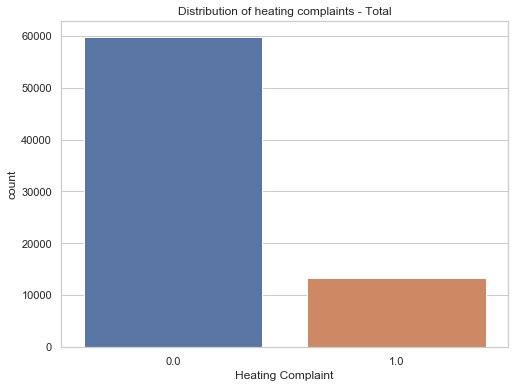

In [25]:
# Before diving into the data, I would like to have a quick overview on balanced the data actually is. 
plt.figure(figsize=(8,6))

sns.countplot(x='Heating Complaint', data = df311_h_bronx_merged)
plt.title('Distribution of heating complaints - Total')

#### Note:
The distribution of heating complaints is highly unbalanced. This is a factor, that needs to be kept in mind, as we go further down the analysis. 

In [26]:
# Pingoiun is a rather new Python library, which provides fairly easy access to commonly used statistical functions and
# and returning the results in Pandas dataframes. Among the use cases for Pingoiun, the correlation analysis table
# is a very nice output to quickly identify relevant relationships.
import pingouin as pg
from scipy.stats import pearsonr
import operator

corr = pg.pairwise_corr(df311_h_bronx_merged, columns=[['Heating Complaint'], df311_h_bronx_merged.columns], method='pearson')
# Get the sorting going, otherwise the frame will be messy
corr = corr.round(2)
corr.sort_values(by=['p-unc','r'],ascending=[True, False])[['X', 'Y', 'n', 'r', 'p-unc']]

,X,Y,n,r,p-unc
12,Heating Complaint,UnitsRes,73141,0.38,0.00
13,Heating Complaint,UnitsTotal,73141,0.38,0.00
11,Heating Complaint,NumFloors,73141,0.37,0.00
3,Heating Complaint,ResArea,73141,0.36,0.00
1,Heating Complaint,BldgArea,73141,0.34,0.00
17,Heating Complaint,BldgDepth,73141,0.33,0.00
21,Heating Complaint,LU2,73141,0.33,0.00
16,Heating Complaint,BldgFront,73141,0.22,0.00
19,Heating Complaint,AssessTot,73141,0.22,0.00
22,Heating Complaint,LU3,73141,0.17,0.00


In [27]:
# Loading the relevant data into a pickle file.
df311_h_bronx_merged.to_pickle('df311_h_bronx_merged.pkl')

## Conclusion
Most of these variables relate to the respective size of the buildings, which is a logical indicator of the occurrence of technical problems in buildings, since the larger the building/area, not only the number of problem areas increases, but also the number of inhabitants who can report problems.

Land Use category 2 ("Multi-Family Walk-Up Buildings") is also an interesting indicator. It can be assumed, for example, that buildings without elevators have tended to be built more cheaply, as they are more often found in financially weak areas and thus also favour the occurrence of heating problems. Furthermore, they may cost lower rents, meaning that they are more often heavily populated and the heating systems wear out accordingly. 